In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

Shape after conversion: (720, 1280)


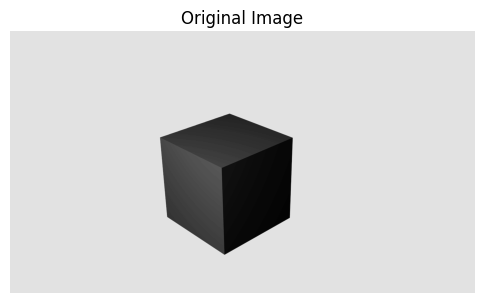

In [27]:
def load_image(path):
    image = Image.open(path).convert('L')
    image_array = np.array(image)
    print("Shape after conversion:", image_array.shape)
    if image_array.ndim == 3 and image_array.shape[2] == 2:
        image_array = image_array[:, :, 0]
        print("Shape after removing extra dimension:", image_array.shape)
    return image_array

image_path = '/content/drive/MyDrive/Digital-Image-Processing/square-1657985_1280.png'
original_image = load_image(image_path)
plt.figure(figsize=(6, 6))
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

In [28]:
def sample_image(image, step):
    sampled_image = image[::step, ::step]
    return sampled_image

In [29]:
def quantize_image(image, levels):
  max_val=255
  quantized=np.floor(image/(max_val/levels)*(max_val/(levels-1)))
  return quantized.astype(np.uint8)

In [32]:
step_size = 16
levels = 8

In [33]:
sampled_image = sample_image(np.array(original_image), step_size)

In [34]:
quantized_image = quantize_image(np.array(original_image), levels)
sampled_and_quantized_image = quantize_image(sampled_image, levels)

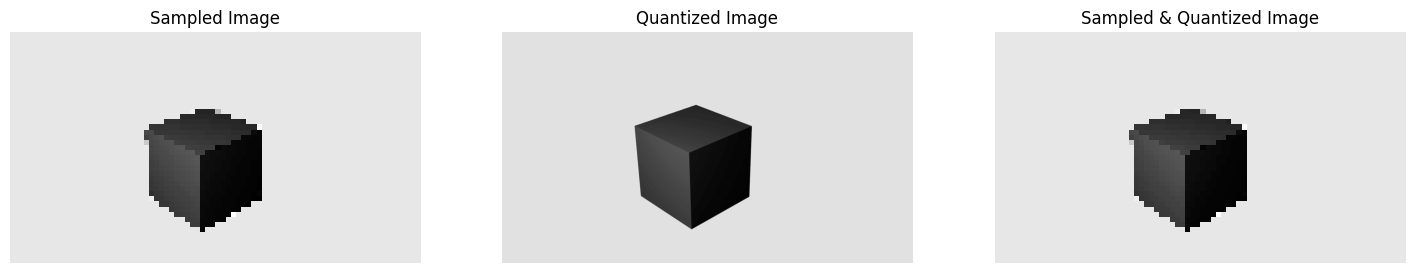

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(sampled_image, cmap='gray')
axs[0].set_title('Sampled Image')
axs[0].axis('off')

axs[1].imshow(quantized_image, cmap='gray')
axs[1].set_title('Quantized Image')
axs[1].axis('off')

axs[2].imshow(sampled_and_quantized_image, cmap='gray')
axs[2].set_title('Sampled & Quantized Image')
axs[2].axis('off')

plt.show()

In [37]:
steps = [2, 10, 20]
levels = [256, 8, 2]

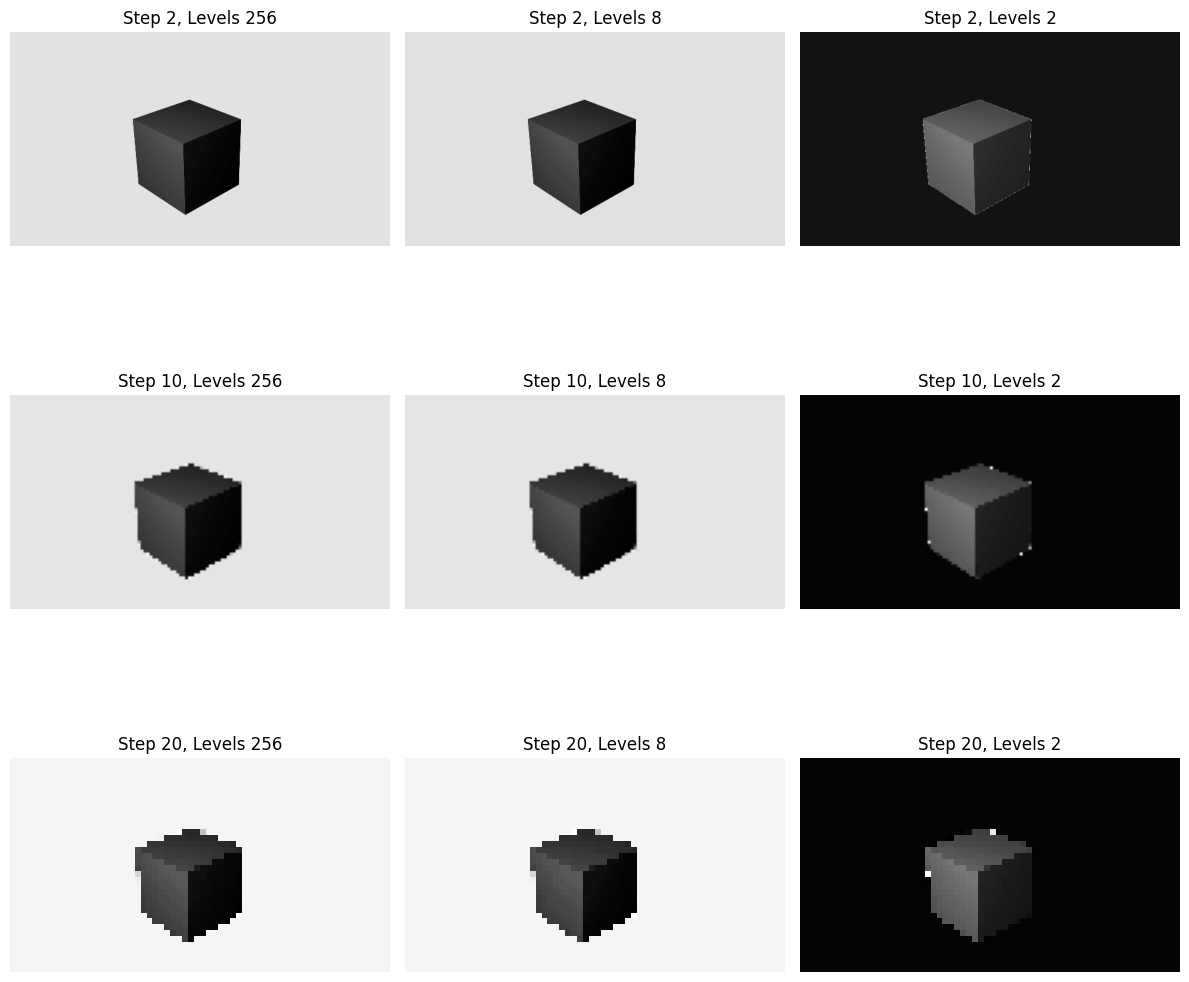

In [39]:
fig, axs = plt.subplots(len(steps), len(levels), figsize=(12, 12))

for i, step in enumerate(steps):
    sampled_image = sample_image(original_image, step)
    for j, level in enumerate(levels):
        quantized_image = quantize_image(sampled_image, level)
        axs[i, j].imshow(quantized_image, cmap='gray')
        axs[i, j].set_title(f'Step {step}, Levels {level}')
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()